---
# Library importation
---

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import PIL.Image

import shap
shap.initjs()

from bibliotheque_ensta import *

print('ok')

ok


In [2]:
print(shap.__version__)

0.39.0


---
# Data importation
---

In [3]:
df = pd.read_csv('det_MF_glider_PPDet_20210112.csv')
df.head()

,dataset,filename,start_time,end_time,start_frequency,end_frequency,annotation,annotator
0,Glider SPAms 2019,29_125_040319_152539_68_HYDRO.wav,0,600,NaN,2000,Cachalot,Brest
1,Glider SPAms 2019,29_125_040319_151539_70_HYDRO.wav,0,600,NaN,2000,Cachalot,Brest
2,Glider SPAms 2019,29_126_040319_155539_76_HYDRO.wav,0,600,NaN,2000,Cachalot,Brest
3,Glider SPAms 2019,29_138_040319_223539_95_HYDRO.wav,0,600,NaN,2000,Son impulsionnel Indetermine,Brest
4,Glider SPAms 2019,29_139_040319_230539_86_HYDRO.wav,0,600,NaN,2000,Son impulsionnel Indetermine,Brest


In [4]:
print(len(df))
df.annotation.unique()

1564


array(['Cachalot', 'Son impulsionnel Indetermine',
       'Autre delphinidé vocalise', 'autre delphinidé clic',
       'Autre myscticète', 'Orque vocalise', 'Baleine à bosse'],
      dtype=object)

In [5]:
#spectros : /home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000_HR/

In [6]:
nom_dir = "/home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000/"

os.chdir(nom_dir)
os.getcwd()

'/home/datawork-osmose/dataset/GliderSPAms/analysis/spectrograms/4000'

In [7]:
l_png = os.listdir()

for i in range(len(l_png)):
    l_png[i] = l_png[i].replace(".png","")

---
# Data formatting
---

In [8]:
print(len(l_png))

4574


In [9]:
filename = list(df.filename.values)

for i in range(len(filename)):
    filename[i] = filename[i].replace(".wav","")
    
print(len(filename))

1564


In [10]:
res = []
for i in filename :
    res.append(np.isin(i,l_png).tolist())
    
idx = np.where(res)[0]

In [11]:
idx[0]

0

In [12]:
idx

array([   0,    1,    2, ..., 1561, 1562, 1563])

In [13]:
for i in idx :
    del l_png[i]

In [14]:
for i in range(len(l_png)):
    l_png[i] = l_png[i] + ".png"

In [15]:
zero = pd.DataFrame(data={'filename':l_png, "label":[0 for i in range(len(l_png))]})
zero.head()

,filename,label
0,30_83_300319_230557_436_HYDRO.png,0
1,30_115_050419_044557_469_HYDRO.png,0
2,30_64_270319_204557_454_HYDRO.png,0
3,29_67_020319_182539_518_HYDRO.png,0
4,30_33_220319_142557_148_HYDRO.png,0


In [16]:
for i in range(len(filename)):
    filename[i] = filename[i] + ".png"

In [17]:
un = pd.DataFrame(data={'filename':filename,'label':[1 for i in range(len(filename))]})
un.head()

,filename,label
0,29_125_040319_152539_68_HYDRO.png,1
1,29_125_040319_151539_70_HYDRO.png,1
2,29_126_040319_155539_76_HYDRO.png,1
3,29_138_040319_223539_95_HYDRO.png,1
4,29_139_040319_230539_86_HYDRO.png,1


In [18]:
df_final = pd.concat([zero,un],ignore_index=True)
df_final.head()

,filename,label
0,30_83_300319_230557_436_HYDRO.png,0
1,30_115_050419_044557_469_HYDRO.png,0
2,30_64_270319_204557_454_HYDRO.png,0
3,29_67_020319_182539_518_HYDRO.png,0
4,30_33_220319_142557_148_HYDRO.png,0


---
# Data preparation
---

In [20]:
X = []
for i in df_final.filename :
    im = PIL.Image.open(i).convert('RGB')
    X.append(np.array(im))
    #X.append(np.resize(np.array(im), [250,250,3]))

In [21]:
print(len(X))
X[0].shape

4574


(204, 704, 3)

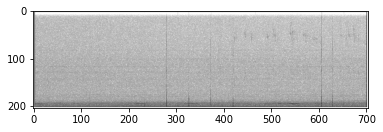

In [22]:
plt.imshow(X[0])
plt.show()  

In [23]:
X = np.asarray(X)/255

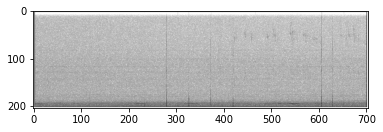

In [24]:
plt.imshow(X[0])
plt.show()  

In [25]:
Y = np.asarray(df_final.label)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [26]:
X_train, X_test, X_val = np.asarray(X_train),np.asarray(X_test),np.asarray(X_val)
y_train, y_test, y_val = np.asarray(y_train),np.asarray(y_test),np.asarray(y_val)

In [27]:
X_train.shape

(3201, 204, 704, 3)

In [28]:
X[0].shape

(204, 704, 3)

---
# DL explainability
---

In [29]:
nom_dir = "/home4/datahome/rbessoua/Presence/"

os.chdir(nom_dir)
os.getcwd()

'/home4/datahome/rbessoua/Presence'

In [30]:
from keras.models import load_model

model = load_model('model_maison1.h5')

In [31]:
# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, X_train[:100])

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values(X_test[:10])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


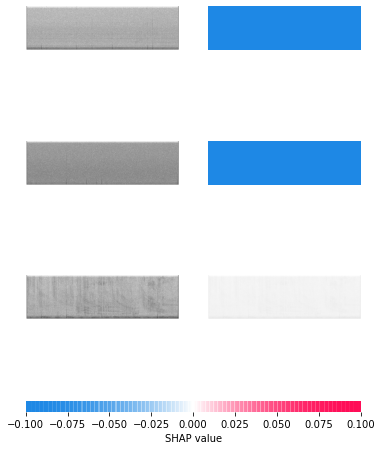

In [56]:
shap.image_plot([shap_values[i] for i in range(1)], X_test[:3])